In [35]:
%pylab inline
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Populating the interactive namespace from numpy and matplotlib


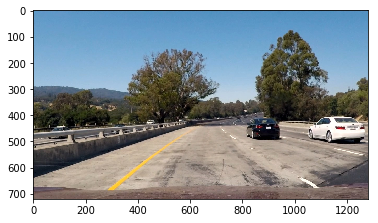

In [13]:
img = plt.imread('test_images/test1.jpg')
plt.imshow(img)

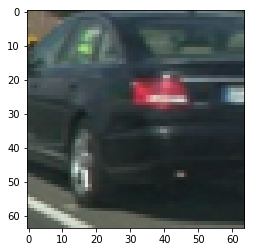

In [15]:
sm_image = plt.imread('classifier/data/vehicles/GTI_Right/image0000.png')
plt.imshow(sm_image)

In [26]:

def get_hog_features(image):
    return hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        transform_sqrt=True,
        feature_vector=True
    )

hog_features = []
for channel in range(sm_image.shape[2]):
    hog_features.append(get_hog_features(sm_image[:, :, channel]))
hog_features = np.ravel(hog_features)

C:\Users\bench\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [27]:
hog_features

array([ 0.00757405,  0.01026665,  0.0586836 , ...,  0.00533309,
        0.00143259,  0.        ])

In [33]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[350, None],
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

def get_windows_with_scale(image):

    sm_windows = slide_window(image, x_start_stop=[500, None], y_start_stop=[400, 550],
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))

    md_windows = slide_window(image, x_start_stop=[500, None], y_start_stop=[400, 600],
                    xy_window=(64*2, 64*2), xy_overlap=(0.5, 0.5))

    lg_windows = slide_window(image, x_start_stop=[500, None], y_start_stop=[400, 600],
                    xy_window=(64*3, 64*3), xy_overlap=(0.5, 0.5))
    
    return sm_windows + md_windows + lg_windows

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    

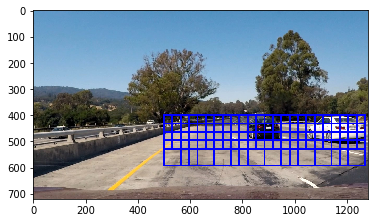

In [36]:
windows = get_windows_with_scale(img)
plt.imshow(draw_boxes(img, windows))